# Лекция: Оценка Качества Моделей — Классические Метрики и Метрики для Детекции, Классификации и Сегментации

В процессе разработки и внедрения моделей машинного обучения критически важно уметь корректно оценивать их качество. Метрики позволяют количественно измерить производительность модели и сравнивать разные модели между собой. В этой лекции мы рассмотрим как классические метрики оценки качества моделей, так и специфические метрики для задач детекции, классификации и сегментации.

## 1. Классические Метрики Оценки Качества Моделей

В классическом машинном обучении, особенно в задачах классификации, существует набор стандартных метрик, которые используются для оценки производительности моделей. Эти метрики помогают понять, насколько хорошо модель способна предсказывать правильные классы, и где она может ошибаться. В этом разделе мы рассмотрим эти метрики более подробно.

# 1.1 Точность (Accuracy)

**Определение**

**Точность** — это простейшая и наиболее интуитивно понятная метрика оценки качества модели. Она представляет собой долю правильных предсказаний модели от общего числа предсказаний.

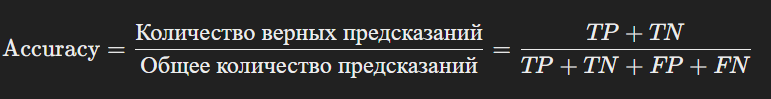

TP (True Positive) — количество истинно положительных предсказаний.

TN (True Negative) — количество истинно отрицательных предсказаний.

FP (False Positive) — количество ложно положительных предсказаний.

FN (False Negative) — количество ложно отрицательных предсказаний.

**Пример**

Рассмотрим задачу бинарной классификации, где модель должна определить, является ли электронное письмо спамом или нет. Из 100 писем:

Модель правильно определила 90 писем (80 не спам и 10 спам).

Ошибочно классифицировала 10 писем (5 спам как не спам и 5 не спам как спам).

Тогда точность модели будет:

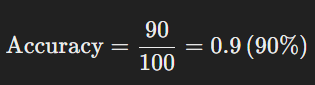

**Преимущества и Недостатки**

Преимущества:

Простота: Легко вычисляется и интерпретируется.
    
Интуитивность: Понятна даже без глубоких знаний в статистике.

Недостатки:

Несбалансированные данные: Точность может вводить в заблуждение, если классы несбалансированы. Например, если 95% данных принадлежат одному классу, модель, всегда предсказывающая этот класс, будет иметь высокую точность (95%), но при этом не будет полезной.

## 1.2 Матрица Ошибок (Confusion Matrix)

**Определение**

Матрица ошибок — это таблица, которая используется для оценки производительности алгоритмов классификации. Она показывает, сколько предсказаний каждого класса были правильно и неправильно классифицированы.

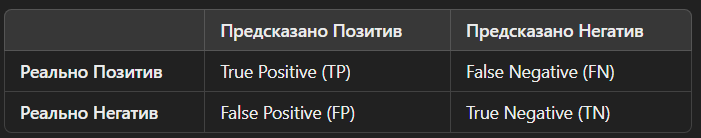

True Positive (TP): Модель правильно предсказала положительный класс.

True Negative (TN): Модель правильно предсказала отрицательный класс.

False Positive (FP): Модель ошибочно предсказала положительный класс (ложная тревога).

False Negative (FN): Модель ошибочно предсказала отрицательный класс (пропущенное обнаружение).

**Пример**

Продолжая пример со спамом:

TP: Письма, которые действительно являются спамом и модель их правильно определила (10).
    
TN: Письма, которые не являются спамом и модель их правильно определила (80).
    
FP: Письма, которые не являются спамом, но модель их пометила как спам (5).
    
FN: Письма, которые являются спамом, но модель их не распознала (5).

**Использование**

Матрица ошибок предоставляет полную картину производительности модели, позволяя вычислять другие метрики, такие как точность, полнота и F1-мера.

## 1.3 Точность и Полнота (Precision and Recall)

### 1.3.1 Точность (Precision)

**Определение**

Точность измеряет, какая доля предсказанных позитивов действительно является позитивами.

**Формула**
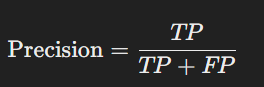

**Интерпретация**

Высокая точность означает, что модель выдает мало ложных срабатываний.

**Пример**

Из 15 писем, которые модель пометила как спам (10 TP + 5 FP), только 10 действительно были спамом.

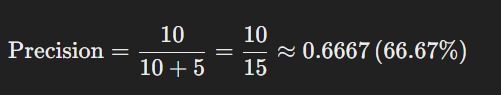

### 1.3.2 Полнота (Recall)

**Определение**

Полнота измеряет, какую долю реальных позитивов модель смогла обнаружить.

**Формула**
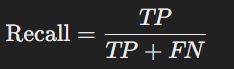

**Интерпретация**

Высокая полнота означает, что модель пропустила мало реальных позитивов.

**Пример**

Из 15 реальных спам-писем (10 TP + 5 FN), модель правильно определила 10.

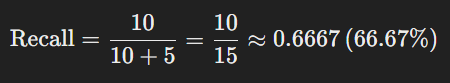

**Баланс Между Точностью и Полнотой**

- Высокая точность, но низкая полнота: Модель строга в своих предсказаниях и выдает мало ложных срабатываний, но может пропустить реальные позитивы.
- Низкая точность, но высокая полнота: Модель захватывает почти все реальные позитивы, но вместе с тем выдает много ложных срабатываний.

## 1.4 F1-Мера

**Определение**

F1-мера объединяет точность и полноту в одну метрику, используя гармоническое среднее. Это особенно полезно, когда необходимо найти баланс между точностью и полнотой.

**Формула**

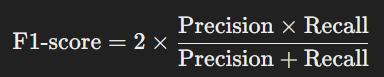

**Пример**
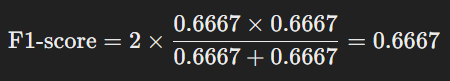

F1-мера достигает своего наилучшего значения в 1 (идеальная точность и полнота) и худшего значения в 0.

**Преимущества**
- Баланс: Учитывает как ложные срабатывания, так и пропущенные позитивы.
- Устойчивость: Менее подвержена влиянию несбалансированных данных по сравнению с точностью.

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)
import pandas as pd
import numpy as np

In [2]:
# Шаг 1: Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Шаг 2: Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [28]:
# Шаг 3: Обучение модели логистической регрессии
model = LogisticRegression(max_iter=10)
model.fit(X_train, y_train)

C:\Users\vahahat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [29]:
# Шаг 4: Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [30]:
# Шаг 5: Вычисление метрик
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

Матрица ошибок:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [31]:
# Точность (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность (Accuracy): {accuracy:.2f}")


Точность (Accuracy): 1.00


In [32]:
# Полнота (Recall)
recall = recall_score(y_test, y_pred, average="macro")
print(f"Полнота (Recall): {recall:.2f}")

Полнота (Recall): 1.00


In [33]:
# Точность (Precision)
precision = precision_score(y_test, y_pred, average="macro")
print(f"Точность (Precision): {precision:.2f}")

Точность (Precision): 1.00


In [34]:
# F1-мера
f1 = f1_score(y_test, y_pred, average="macro")
print(f"F1-мера: {f1:.2f}")

F1-мера: 1.00


In [35]:
metrics = pd.DataFrame(
    {
        "Precision": precision_score(y_test, y_pred, average=None),
        "Recall": recall_score(y_test, y_pred, average=None),
        "F1-score": f1_score(y_test, y_pred, average=None),
    },
    index=iris.target_names,
)
print("\nМетрики по каждому классу:")


Метрики по каждому классу:


In [36]:
print(metrics)

            Precision  Recall  F1-score
setosa            1.0     1.0       1.0
versicolor        1.0     1.0       1.0
virginica         1.0     1.0       1.0


In [ ]:
# Шаг 3: Инициализация модели SGDClassifier с логистической регрессией
model = SGDClassifier(loss='log_loss', random_state=42)

# Шаг 4: Подготовка для итеративного обучения
epochs = 50  # Количество эпох обучения

# Списки для хранения метрик на каждой эпохе
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Получение уникальных меток классов (требуется для partial_fit)
classes = np.unique(y_train)

# Шаг 5: Цикл обучения по эпохам
for epoch in range(epochs):
    # Обучение модели на обучающих данных
    model.partial_fit(X_train, y_train, classes=classes)
    
    # Предсказание на тестовых данных
    y_pred = model.predict(X_test)
    
    # Вычисление метрик
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    
    # Сохранение метрик
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
# Шаг 6: Построение графиков для каждой метрики
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 8))

# График точности (Accuracy)
plt.subplot(2, 2, 1)
plt.plot(epochs_range, accuracy_scores, label='Accuracy', marker='o')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.title('Точность на каждой эпохе')
plt.legend()
plt.grid(True)

# График Precision
plt.subplot(2, 2, 2)
plt.plot(epochs_range, precision_scores, label='Precision', color='orange', marker='o')
plt.xlabel('Эпоха')
plt.ylabel('Precision')
plt.title('Precision на каждой эпохе')
plt.legend()
plt.grid(True)

# График Recall
plt.subplot(2, 2, 3)
plt.plot(epochs_range, recall_scores, label='Recall', color='green', marker='o')
plt.xlabel('Эпоха')
plt.ylabel('Recall')
plt.title('Recall на каждой эпохе')
plt.legend()
plt.grid(True)

# График F1-score
plt.subplot(2, 2, 4)
plt.plot(epochs_range, f1_scores, label='F1-score', color='red', marker='o')
plt.xlabel('Эпоха')
plt.ylabel('F1-score')
plt.title('F1-score на каждой эпохе')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 1.5 ROC и AUC

### 1.5.1 ROC-кривая (Receiver Operating Characteristic)

**Определение**

ROC-кривая — это график, который показывает соотношение между долей истинно положительных предсказаний (TPR, также известной как полнота) и долей ложно положительных предсказаний (FPR) при различных порогах классификации.

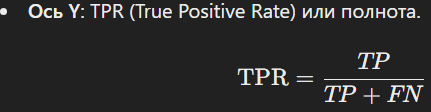
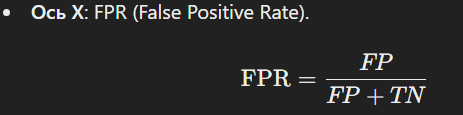

**Интерпретация**
- Идеальная модель: ROC-кривая проходит через верхний левый угол графика (TPR = 1, FPR = 0).
- Случайная модель: ROC-кривая представляет собой диагональ от нижнего левого до верхнего правого угла.

### 1.5.2 AUC (Area Under Curve)

**Определение** 
AUC — это площадь под ROC-кривой. Она измеряет общую способность модели различать классы.

**Интерпретация Значений AUC**
- AUC = 1: Идеальная модель.
- AUC = 0.5: Модель не лучше случайного угадывания.
- AUC < 0.5: Модель хуже случайного угадывания (возможно, перепутаны классы).

**Пример**

Если модель имеет AUC = 0.9, это означает, что в 90% случаев она правильно различает положительный и отрицательный классы.

**Преимущества ROC-AUC**
- Независимость от порога: Показывает производительность модели при всех возможных порогах.
- Устойчивость к несбалансированным данным: AUC учитывает ранжирование предсказаний, а не их абсолютные значения.

In [48]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zhaoyingzhu/heartcsv")

100%|█████████████████████████████████████████████████████████████████████████████| 4.55k/4.55k [00:00<00:00, 4.65MB/s]

Extracting files...


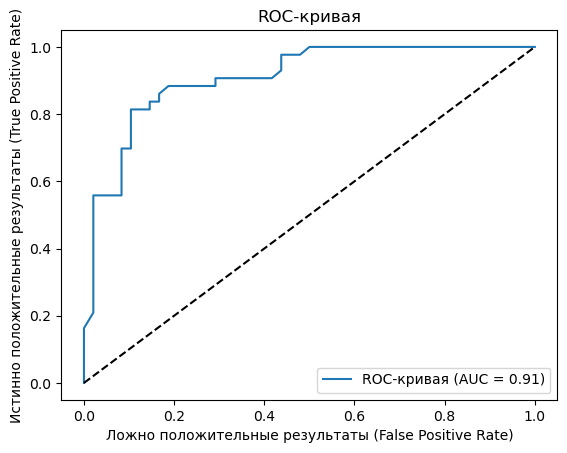

Площадь под ROC-кривой (AUC): 0.91


In [53]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Загрузка и подготовка данных
data = pd.read_csv('Heart.csv')
data['AHD'] = data['AHD'].map({'Yes': 1, 'No': 0})  # Преобразование целевого столбца в бинарные значения

# Преобразование категориальных переменных с помощью get_dummies
data = pd.get_dummies(data, columns=['ChestPain', 'Thal'], drop_first=True)

# Заполнение пропущенных значений медианой
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Определение признаков и целевой переменной
X = data_imputed.drop(['AHD', 'Unnamed: 0'], axis=1)
y = data_imputed['AHD']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Получение предсказанных вероятностей
y_probs = model.predict_proba(X_test)[:, 1]

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label='ROC-кривая (AUC = %0.2f)' % roc_auc_score(y_test, y_probs))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Ложно положительные результаты (False Positive Rate)')
plt.ylabel('Истинно положительные результаты (True Positive Rate)')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Вычисление AUC
auc = roc_auc_score(y_test, y_probs)
print(f"Площадь под ROC-кривой (AUC): {auc:.2f}")



In [54]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arockiaselciaa/creditcardcsv")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 66.0M/66.0M [00:03<00:00, 21.9MB/s]

Extracting files...


Path to dataset files: C:\Users\vahahat\.cache\kagglehub\datasets\arockiaselciaa\creditcardcsv\versions\1


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)
from imblearn.over_sampling import RandomOverSampler

In [8]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Шаг 2: Исследование распределения классов
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
# Шаг 3: Разделение данных на признаки и целевую переменную
X = data.drop('Class', axis=1)
y = data['Class']

In [11]:
# Шаг 4: Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [12]:
# Шаг 5: Обучение модели без учета несбалансированности
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
# Вычисление метрик
print("Метрики без балансировки:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

Метрики без балансировки:
Accuracy: 1.00
Precision: 0.70
Recall: 0.75
F1-score: 0.72


In [ ]:
# Шаг 6: Применение метода балансировки (oversampling)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
# Шаг 7: Обучение модели на сбалансированных данных
model_balanced = DecisionTreeClassifier(random_state=42)
model_balanced.fit(X_resampled, y_resampled)
y_pred_balanced = model_balanced.predict(X_test)

In [ ]:
# Вычисление метрик
print("\nМетрики с балансировкой:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_balanced):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_balanced):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_balanced):.2f}")

# Шаг 8: Выводы
print("\nАнализ результатов:")
print("Балансировка данных улучшила показатели Recall и F1-score, что важно при обнаружении мошенничества.")

## Логарифмическая Потеря (Log Loss)

Log Loss измеряет производительность классификационной модели, где предсказываются вероятности принадлежности к классу.

Для бинарной классификации:

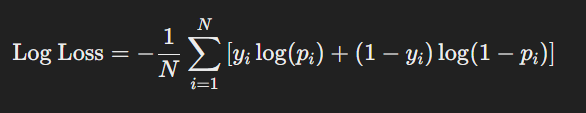

где:

𝑦
𝑖
y 
i
​
  — истинная метка класса (0 или 1).
𝑝
𝑖
p 
i
​
  — предсказанная вероятность класса 1.

**Практические Соображения**

**Выбор Метрики**

- Несбалансированные данные: Используйте метрики, устойчивые к несбалансированным данным (F1-мера, AUC-PR).
- Критичность ошибок: Если важнее избегать ложных срабатываний, сосредоточьтесь на точности. Если важнее обнаружить все позитивы, даже с риском ложных тревог, сосредоточьтесь на полноте.
- Вероятностные предсказания: Если модель выдает вероятности, используйте метрики, учитывающие вероятностную природу (Log Loss, AUC).

**Визуализация**
- Матрица ошибок: Помогает визуально оценить, какие классы модель путает чаще всего.
- ROC и PR кривые: Позволяют сравнивать модели при различных порогах.

**Кросс-Валидация**

Для получения надежных оценок метрик рекомендуется использовать кросс-валидацию, особенно на небольших наборах данных.

**Выводы**

Понимание классических метрик оценки качества моделей является фундаментальным для разработки эффективных алгоритмов машинного обучения. Правильный выбор и интерпретация метрик позволяют не только оценить текущую производительность модели, но и выявить направления для ее улучшения.

**Ключевые моменты:**

- Точность хороша для сбалансированных данных, но может быть вводящей в заблуждение на несбалансированных.
- Точность и полнота позволяют глубже понять характер ошибок модели.
- F1-мера полезна для балансировки между точностью и полнотой.
- ROC-AUC предоставляет обобщенную оценку способности модели различать классы.
- Выбор метрики должен соответствовать специфике задачи и данных.

# 2.2 Мультиклассовая Классификация 

В мультиклассовой классификации модель должна предсказывать один из более чем двух классов. Это добавляет сложности в оценке модели, и требует расширения метрик для многоклассовых задач.

## 2.2.1 Матрица Ошибок для Мультиклассовой Классификации

Матрица ошибок становится матрицей размером 
𝐾
×
𝐾
K×K, где 
𝐾
K — количество классов.

Элемент 
𝑀
𝑖
𝑗
M 
ij
​
  показывает количество наблюдений, принадлежащих классу 
𝑖
i, но предсказанных как класс 
𝑗
j.

## 2.2.2 Расчет Метрик для Мультиклассовых Задач

Для каждого класса можно вычислить TP, FP, FN и TN, рассматривая данный класс как положительный, а все остальные как отрицательные (One-vs-All подход)

Точность, Полнота и F1-мера для Классов

Точность класса 
𝑖
i:

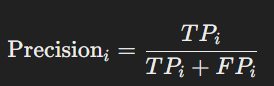

Полнота класса i

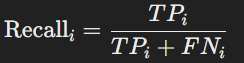

F1-мера класса 
𝑖


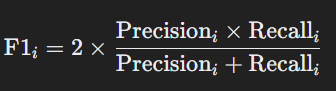

## 2.2.3 Методы Усреднения 

При оценке общей производительности модели необходимо агрегировать метрики по всем классам. Существует несколько методов усреднения:

**Micro-Average**
- Micro-average учитывает общий счет TP, FP и FN по всем классам и вычисляет метрики на основе этих сумм.
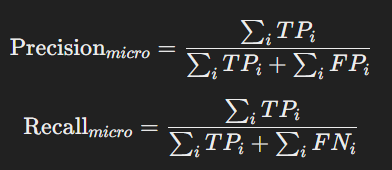
- Особенности: Micro-average дает одинаковые значения для точности и полноты, поскольку они рассчитываются на общих суммах.

**Macro-Average**

- Macro-average вычисляет метрики для каждого класса отдельно и затем усредняет их.
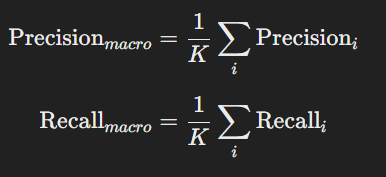
- Особенности: Macro-average дает равный вес каждому классу, независимо от его размера.

**Weighted-Average**
- Weighted-average усредняет метрики с учетом количества истинных экземпляров каждого класса.
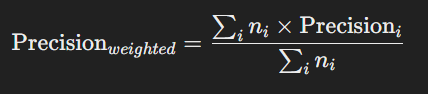
- где 
𝑛
𝑖
n 
i
​
  — количество истинных наблюдений класса 
𝑖
i.

- Особенности: Классы с большим количеством наблюдений имеют больший вес.

## 2.2.4 Пример
    Рассмотрим задачу классификации изображений на три класса: "Кошки", "Собаки" и "Кролики".

- Класс "Кошки":

𝑇
𝑃
𝑐
𝑎
𝑡
TP 
cat
​
 , 
𝐹
𝑃
𝑐
𝑎
𝑡
FP 
cat
​
 , 
𝐹
𝑁
𝑐
𝑎
𝑡
FN 
cat
​
  вычисляются, считая "Кошки" как положительный класс, а остальные как отрицательный.
- Класс "Собаки" и "Кролики" аналогично.

- После вычисления метрик для каждого класса можно применить методы усреднения.

## 2.2.5 Кросс-энтропийная Потеря (Cross-Entropy Loss)

В задачах классификации, особенно с использованием нейронных сетей, часто используется кросс-энтропийная функция потерь.

**Формула**

Для мультиклассовой классификации с 
𝐾
K классами:

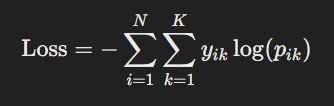

где:

𝑦
𝑖
𝑘
y 
ik
​

  — индикатор того, что объект 
𝑖
i принадлежит классу 

𝑘
k (1 или 0).

𝑝
𝑖
𝑘
p 
ik
​
  — предсказанная моделью вероятность принадлежности объекта 
𝑖
i классу 
𝑘
k.

**Свойства**

- Чувствительность к уверенным ошибкам: Высокие штрафы за уверенные, но неправильные предсказания.
- Дифференцируемость: Подходит для оптимизации с помощью градиентных методов.

## 2.2.6 Hamming Loss

Hamming Loss используется в мульти-лейбл классификации, где объект может принадлежать нескольким классам одновременно.

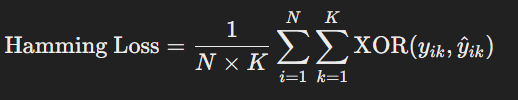

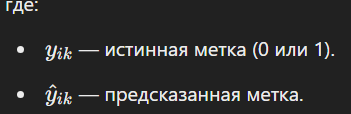

## 2.2.7 Matthews Correlation Coefficient (MCC)

MCC — метрика, которая учитывает все элементы матрицы ошибок и является хорошей обобщенной мерой качества классификации.

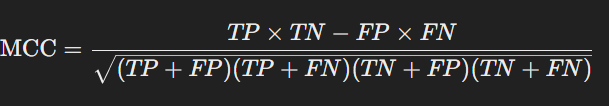

MCC принимает значения от -1 (полная анти-корреляция) до +1 (полная корреляция), где 0 соответствует случайному угадыванию.

## 2.3 Практические Соображения

### 2.3.1 Выбор Подходящих Метрик
- Несбалансированные Данные: При сильном дисбалансе классов рекомендуется использовать метрики, устойчивые к этому, такие как F1-мера, PR-AUC, MCC.

- Значимость Классов: Если некоторые классы более важны, можно использовать взвешенные метрики или уделить особое внимание метрикам этих классов.

### 2.3.2 Использование Метрик в Моделировании
- Отслеживание Метрик при Обучении: При обучении модели важно следить за метриками на валидационном наборе, чтобы избежать переобучения.

- Визуализация: Построение графиков ROC и PR кривых может помочь в выборе оптимального порога классификации.

### 2.3.3 Кросс-Валидация и Бутстреппинг
- Кросс-Валидация: Разбиение данных на несколько фолдов и вычисление метрик на каждом из них для получения более надежных оценок.

- Бутстреппинг: Метод повторной выборки данных для оценки статистической значимости метрик.

## 2.4 Примеры Использования Метрик

### Пример 1: Классификация Мошеннических Транзакций
- Проблема: Мошеннические транзакции составляют 0.1% от всех транзакций.

- Задача: Обнаружить как можно больше мошеннических транзакций (высокая полнота), при этом минимизируя количество ложных тревог (высокая точность).

- Метрики: Использование F1-мера, PR-AUC, поскольку данные несбалансированы.

Метрики для задач классификации предоставляют инструменты для количественной оценки производительности моделей. Правильный выбор и интерпретация этих метрик критически важны для разработки эффективных моделей и принятия обоснованных решений.

**Ключевые моменты:**

- В бинарной классификации важно учитывать баланс между точностью и полнотой.

- В мультиклассовой классификации методы усреднения позволяют агрегировать метрики по классам.

- Выбор метрик должен соответствовать специфике задачи и характеристикам данных.

**Рекомендации:**

- Всегда анализируйте матрицу ошибок для понимания характера ошибок модели.

- Используйте несколько метрик для получения полной картины производительности.

- Учитывайте особенности данных (например, дисбаланс классов) при выборе метрик.

# 3. Метрики для Задач Детекции

    В задачах детекции объектов модель должна не только определить наличие объекта определенного класса на изображении, но и локализовать его, указав точные координаты ограничивающего прямоугольника (bounding box). Это делает оценку качества модели детекции более сложной задачей по сравнению с классической классификацией. В этом разделе мы подробно рассмотрим метрики, используемые для оценки моделей детекции, и особенности их применения.

## 3.1 Особенности Оценки Моделей Детекции

Перед тем как перейти к метрикам, важно понять, с какими проблемами сталкиваются модели детекции:

- Локализация и Классификация: Модель должна правильно определить класс объекта и точно локализовать его на изображении.
- Множественные Объекты: На одном изображении может быть несколько объектов разных классов.
- Разные Размеры и Пропорции: Объекты могут иметь разные размеры и формы.
- Перекрытия: Объекты могут частично перекрывать друг друга.

Из-за этих особенностей метрики оценки качества моделей детекции должны учитывать как точность локализации, так и точность классификации.

## 3.2 Пересечение над Объединением (Intersection over Union, IoU)

Пересечение над объединением (IoU) — это основная метрика для оценки точности локализации объектов. Она измеряет степень совпадения между предсказанным ограничивающим прямоугольником и истинным (реальным) ограничивающим прямоугольником объекта.

**Формула**

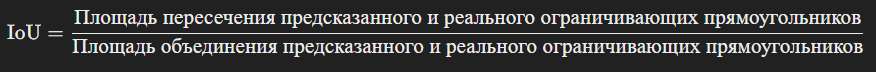

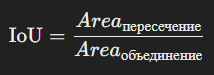

**Интерпретация**
- IoU = 0: Нет пересечения между предсказанным и реальным ограничивающими прямоугольниками.
- IoU = 1: Полное совпадение предсказанного и реального ограничивающих прямоугольников.
- IoU > 0: Есть некоторое пересечение.

**Пороговое Значение IoU**

При оценке детекции обычно устанавливается пороговое значение IoU (например, 0.5), выше которого предсказание считается правильным по локализации.

- IoU ≥ 0.5: Предсказание считается верным (по локализации).
- IoU < 0.5: Предсказание считается неверным.

**Пример**

Предположим, что:

- Площадь пересечения предсказанного и реального ограничивающих прямоугольников составляет 40 пикселей.
- Площадь объединения предсказанного и реального ограничивающих прямоугольников составляет 100 пикселей.

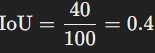

В данном случае, если пороговое значение IoU равно 0.5, то такое предсказание не будет считаться верным по локализации.

## 3.3 Точность и Полнота в Контексте Детекции

### 3.3.1 Определения

В задачах детекции понятия точности и полноты также применимы, но с учетом особенностей детекции.

- Точность (Precision): Доля правильно предсказанных объектов (True Positives) к общему числу предсказанных объектов (True Positives + False Positives).
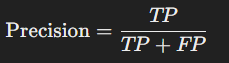

- Полнота (Recall): Доля правильно предсказанных объектов к общему числу реальных объектов (True Positives + False Negatives).
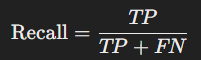

### 3.3.2 True Positives, False Positives и False Negatives в Детекции

- True Positive (TP): Предсказание, которое правильно определило класс объекта и его локализацию с IoU ≥ порогового значения.
- False Positive (FP): Предсказание, которое либо неправильно определило класс объекта, либо имеет IoU < порогового значения, либо предсказало объект, которого нет.
- False Negative (FN): Реальный объект, который модель не смогла обнаружить.

**Особенности**
- В детекции важно правильно определять и локализацию, и класс объекта.
- Неправильная классификация объекта (правильная локализация, но неправильный класс) считается False Positive.

### 3.4 Average Precision (AP)
- Средняя точность (Average Precision, AP) — это интегральная метрика, которая измеряет качество модели детекции, объединяя информацию о точности и полноте при различных порогах уверенности модели.

Для вычисления AP строится кривая зависимости точности от полноты при изменении порога уверенности модели.

- По оси X: Полнота (Recall).
- По оси Y: Точность (Precision).

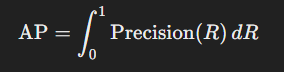

**Дискретное Вычисление**

На практике AP часто вычисляется дискретно:

- Сортируются предсказания по убыванию уверенности модели.
- Для каждого порога уверенности вычисляются значения точности и полноты.
- Площадь под кривой приближается суммированием по отрезкам.

## 3.5 Mean Average Precision (mAP)

**Определение**
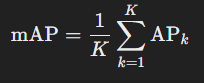

K — общее количество классов.
AP
𝑘
AP 
k
​
  — значение Average Precision для класса 
𝑘
k.

Средняя средняя точность (Mean Average Precision, mAP) — это среднее значение AP по всем классам объектов.

**Интерпретация**

- mAP измеряет общую производительность модели по всем классам.
- Позволяет сравнивать модели между собой на основе единой метрики.

**Вариации mAP**
- mAP@0.5: mAP при фиксированном пороге IoU = 0.5.
- mAP@[0.5:0.95]: mAP, усредненный по разным порогам IoU от 0.5 до 0.95 с шагом 0.05 (используется в MS COCO).

## 3.6 Порог IoU и Его Влияние на Метрики

### 3.6.1 Различные Пороги IoU
- Низкие пороги (например, IoU ≥ 0.5): Более лояльны к ошибкам в локализации, учитывают больше предсказаний как верные.
- Высокие пороги (например, IoU ≥ 0.75): Строже к точности локализации, требуют более точного совпадения ограничивающих прямоугольников.

### 3.6.2 Использование Нескольких Порогов
- Оценка модели при разных порогах IoU позволяет понять, насколько точно модель локализует объекты.
- В MS COCO метрике mAP вычисляется при порогах от 0.5 до 0.95 с шагом 0.05, что дает более полное представление о производительности модели.

## 3.7 Влияние Размеров Объектов на Метрики
### 3.7.1 Классификация по Размеру
- Small (маленькие объекты): Площадь меньше определенного порога (например, area < 32^2 пикселей).
- Medium (средние объекты): Площадь между определенными порогами (например, 32^2 ≤ area < 96^2 пикселей).
- Large (большие объекты): Площадь больше определенного порога (например, area ≥ 96^2 пикселей).

### 3.7.2 Вычисление mAP по Размеру
- mAP можно вычислять отдельно для маленьких, средних и больших объектов.
- Это позволяет оценить, насколько хорошо модель справляется с объектами разных размеров.

### 3.7.3 Пример
- mAP_small: Средняя точность для маленьких объектов.
- mAP_medium: Средняя точность для средних объектов.
- mAP_large: Средняя точность для больших объектов.

## 3.8 Non-Maximum Suppression (NMS) и Дублирование Предсказаний
### 3.8.1 Проблема Множественных Предсказаний
- Модель может предсказывать несколько ограничивающих прямоугольников для одного и того же объекта с разными уровнями уверенности.
- Это приводит к увеличению числа False Positives.

### 3.8.2 Non-Maximum Suppression (NMS)
- NMS — это метод, который устраняет дублирующие предсказания, оставляя только наиболее вероятное.

**Алгоритм NMS:**
- Сортирует предсказания по убыванию уверенности.
- Выбирает предсказание с наибольшей уверенностью.
- Удаляет все остальные предсказания, которые имеют IoU выше заданного порога с выбранным предсказанием.
- Повторяет процесс для оставшихся предсказаний.

**Влияние на Метрики**
- Правильное применение NMS уменьшает количество ложных срабатываний.
- Улучшает точность модели.

## 3.9 Оценка Детекции в Практике
3.9.1 Пример: MS COCO Метрики
MS COCO — один из наиболее известных датасетов для задач детекции, и он вводит свои собственные метрики для оценки моделей.

Основные Метрики COCO:
AP@[0.5:0.95]: mAP при IoU от 0.5 до 0.95 с шагом 0.05.
AP@0.5: mAP при IoU = 0.5 (PASCAL VOC метрика).
AP@0.75: mAP при IoU = 0.75 (более строгая метрика).
AP_small, AP_medium, AP_large: mAP для объектов разных размеров.
AR (Average Recall): Средняя полнота при различных количествах предсказаний.

## 3.9 Оценка Детекции в Практике
### 3.9.1 Пример: MS COCO Метрики

MS COCO — один из наиболее известных датасетов для задач детекции, и он вводит свои собственные метрики для оценки моделей.

Основные Метрики COCO:
- AP@[0.5:0.95]: mAP при IoU от 0.5 до 0.95 с шагом 0.05.
- AP@0.5: mAP при IoU = 0.5 (PASCAL VOC метрика).
- AP@0.75: mAP при IoU = 0.75 (более строгая метрика).
- AP_small, AP_medium, AP_large: mAP для объектов разных размеров.
- AR (Average Recall): Средняя полнота при различных количествах предсказаний.

### 3.9.2 Пример Расчета

Предположим, что модель имеет следующие значения:

- AP@[0.5:0.95]: 35%
- AP@0.5: 60%
- AP@0.75: 40%
- AP_small: 15%
- AP_medium: 40%
- AP_large: 55%

Это означает, что:

- При строгих порогах IoU модель работает хуже, что указывает на проблемы с точной локализацией.
- Модель хуже справляется с детекцией маленьких объектов.

## 3.10 Другие Метрики в Детекции
### 3.10.1 Frame Per Second (FPS)
- FPS: Количество кадров, обрабатываемых моделью в секунду.
- Важно для реальных приложений, где нужна высокая скорость детекции (например, видеоаналитика).

### 3.10.2 Average Recall (AR)
- Average Recall (AR): Средняя полнота при фиксированном количестве предсказаний на изображение.
- Позволяет оценить, насколько хорошо модель обнаруживает все объекты на изображении.

### 3.10.3 Localization Error

- Оценивает среднюю ошибку в локализации объектов, например, среднее отклонение координат предсказанных ограничивающих прямоугольников от реальных.

### 3.10.4 Confusion Matrix для Детекции

Матрица ошибок может быть расширена для задач детекции, учитывая как ошибки классификации, так и локализации.

## 3.11 Практические Рекомендации
### 3.11.1 Выбор Метрик
- Используйте mAP при разных порогах IoU для полной оценки модели.
- Анализируйте AP для каждого класса отдельно, чтобы выявить слабые стороны модели.
- Оценивайте производительность модели на объектах разных размеров.

### 3.11.2 Тестирование на Реальных Данных
- Используйте тестовые наборы данных, приближенные к реальным условиям использования модели.
- Оценивайте модель на данных с различными условиями съемки, освещения, углами обзора и т.д.

### 3.11.3 Улучшение Модели
- Если модель плохо справляется с маленькими объектами, рассмотрите возможность увеличения разрешения входных изображений или использования специальных архитектур.
- Настройка порогов уверенности и порогов IoU может улучшить производительность модели.

Оценка моделей детекции объектов является сложной задачей, требующей использования специализированных метрик, которые учитывают как точность локализации, так и правильность классификации объектов. Понимание и правильное применение этих метрик позволяют разработчикам улучшать модели и делать осознанные выводы о их производительности.

**Ключевые моменты:**

- IoU является фундаментальной метрикой для оценки точности локализации.
- Average Precision (AP) и Mean Average Precision (mAP) объединяют информацию о точности и полноте модели при различных порогах.
- Использование разных порогов IoU и анализ производительности на объектах разных размеров дают более полное представление о работе модели.
- Non-Maximum Suppression (NMS) является важным шагом в предобработке предсказаний модели.

**Рекомендации:**

- При оценке модели используйте метрики, принятые в сообществе для вашей задачи (например, MS COCO метрики).
- Анализируйте ошибки модели, чтобы понять, где она работает плохо, и направить усилия на улучшение этих аспектов.
- Постоянно сравнивайте производительность модели с базовыми или эталонными результатами.

In [8]:
# Истинные ограничивающие рамки (формат: [x_min, y_min, x_max, y_max])
gt_boxes = [
    [50, 50, 150, 150],
    [30, 30, 70, 70]
]

# Предсказанные ограничивающие рамки и оценки уверенности
pred_boxes = [
    {'box': [48, 48, 152, 152], 'score': 0.9},
    {'box': [28, 28, 72, 72], 'score': 0.75},
    {'box': [100, 100, 200, 200], 'score': 0.6}
]

In [9]:
def calculate_iou(box1,box2):
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])
    
    if x_right < x_left or y_bottom < y_top:
        return 0.0 # нет пересечений
#     площадь перечения
    intersection_area = (x_right-x_left)*(y_bottom-y_top)
#  площади рамок
    box1_area = (box1[2]-box1[0])*(box1[3]-box1[1])
    box2_area = (box2[2]-box2[0])*(box2[3]-box2[1])
    
    iou = intersection_area / float(box1_area+box2_area - intersection_area)
    return iou

In [11]:
iou_thershhold = 0.5 # порог

In [10]:
pred_boxes_sorted = sorted(pred_boxes, key= lambda x:x['score'], reverse= True)

In [12]:
# Списки для хранения совпадений
tp = 0  # True Positives
fp = 0  # False Positives
fn = 0  # False Negatives
matched_gt_boxes = []

In [ ]:
for pred in pred_boxes_sorted:
    pred_box = pred['box']
    best_iou = 0
    best_gt_idx = -1
    for idx, gt_box in enumerate (gt_boxes):
        if idx in matched_gt_boxes:
            continue
        iou = calculate_iou(pred_box, gt_box)
        if iou>best_iou:
            best_iou = iou
            best_gt_idx = idx
    if best_iou >= iou_thershhold
        tp+=1
        matched_gt_boxes.append(best_gt_idx)
    else:
        fp+=1
fn = len(gt_boxes) - tp
        
        
        

## 4. Метрики для Задач Сегментации

В задачах сегментации цель модели состоит в том, чтобы присвоить каждому пикселю изображения метку класса. Это позволяет выделить объекты или области интереса на уровне пикселей. Сегментация играет ключевую роль в областях, требующих точной локализации объектов, таких как медицинская диагностика, автономное вождение и анализ спутниковых снимков.

В этом разделе мы подробно рассмотрим метрики, используемые для оценки качества моделей сегментации, их математические формулы, интерпретации и практические рекомендации по их использованию.

## 4.1 Типы Сегментации

**Прежде чем перейти к метрикам, важно понимать различные типы задач сегментации:**

- Семантическая сегментация: Классификация каждого пикселя изображения в один из предопределенных классов. Все объекты одного класса считаются одним экземпляром.

- Инстансная сегментация: Идентификация отдельных экземпляров объектов. Модель должна различать разные объекты одного класса.

- Паноптическая сегментация: Объединяет семантическую и инстансную сегментацию, обеспечивая непрерывную сегментацию сцены с идентификацией отдельных экземпляров объектов.

## 4.2 Особенности Оценки Моделей Сегментации
**При оценке моделей сегментации необходимо учитывать следующие особенности:**

- Высокое разрешение данных: Предсказания производятся на уровне пикселей, что приводит к большим объемам данных для обработки.

- Несбалансированность классов: Некоторые классы могут занимать малую долю изображения, что усложняет их корректное предсказание.

- Точность границ: Важна точная сегментация границ объектов, особенно в медицинских и технических приложениях.

## 4.3 Метрики для Оценки Сегментации
### 4.3.1 Пиксельная Точность (Pixel Accuracy)
**Определение**
Пиксельная точность измеряет долю правильно классифицированных пикселей от общего числа пикселей.

**Формула**

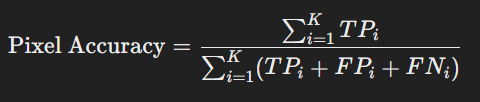

Где:

𝑇
𝑃
𝑖
TP 
i
​
  — количество пикселей класса 
𝑖
i, правильно предсказанных моделью.
𝐾
K — общее количество классов.

**Интерпретация**
- Высокое значение: Модель правильно классифицирует большинство пикселей.
- Недостатки: Может быть вводящей в заблуждение при несбалансированных данных, так как преобладающий класс будет доминировать в метрике.

## 4.3.2 Средняя Пиксельная Точность (Mean Pixel Accuracy)
**Определение**
- Средняя пиксельная точность вычисляет точность для каждого класса отдельно и затем усредняет их.

**Формула**

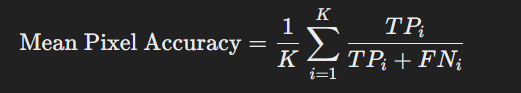

**Интерпретация**
- Уравновешивает вклад каждого класса, независимо от его размера.
- Более информативна при несбалансированных данных.

## 4.3.3 Коэффициент Дайса (Dice Coefficient)
**Определение**
  
Коэффициент Дайса, также известный как F1-score для сегментации, измеряет сходство между предсказанной и истинной масками.

**Формула**

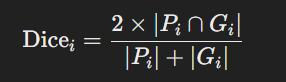

Где:

𝑃
𝑖
P 
i
​
  — предсказанная маска для класса 
𝑖
i.
𝐺
𝑖
G 
i
​
  — истинная (ground truth) маска для класса 
𝑖
i.

**Интерпретация**
- Значение от 0 до 1: 1 соответствует полному совпадению масок.
- Чувствителен к малым объектам: Более чувствителен к пропущенным пикселям.

**Пример**

Если модель предсказала 70 пикселей класса 
𝑖
i, из которых 50 совпадают с истинной маской, а истинная маска содержит 60 пикселей:

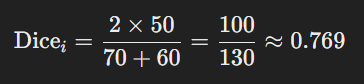

## 4.3.4 Индекс Жаккара (Jaccard Index) или Intersection over Union (IoU)

**Определение**

Индекс Жаккара измеряет степень совпадения между предсказанной и истинной масками.

**Формула**

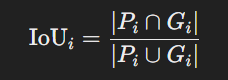

**Интерпретация**
- Значение от 0 до 1: 1 соответствует полному совпадению.
- Более строгая метрика, чем коэффициент Дайса.

Связь с коэффициентом Дайса

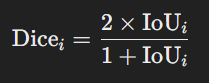

## 4.3.5 Средний IoU (Mean Intersection over Union, mIoU)
**Определение**

Средний IoU — это среднее значение IoU по всем классам.

**Формула**

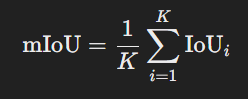

**Интерпретация**
- Основная метрика для оценки моделей сегментации.
- Уравновешивает вклад каждого класса.

## 4.3.6 Показатель F_
𝛽
β
**Определение**
Показатель F_
𝛽
β — обобщенная версия F1-мера, где 
𝛽
β позволяет регулировать баланс между точностью и полнотой.

**Формула**

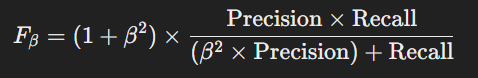

Где:

Precision — точность на уровне пикселей.
Recall — полнота на уровне пикселей.
𝛽
β — весовой коэффициент (обычно 
𝛽
= 1 β=1 для равного баланса).

## 4.3.7 Метрики Границ (Boundary Metrics)
**Определение**
Метрики, оценивающие точность предсказания границ объектов.

**Пример**: Boundary F1-Score (BF1)
Оценивает, насколько точно модель предсказывает границы объектов.
Важно в задачах, где точность границ критична (например, в медицинской сегментации).

## 4.3.8 Confusion Matrix на Уровне Пикселей
**Определение**
Матрица ошибок строится на основе предсказаний и истинных меток каждого пикселя.

- True Positive (TP): Пиксели, правильно предсказанные для класса 
𝑖
i.
- False Positive (FP): Пиксели, неправильно предсказанные как класс 
𝑖
i.
- False Negative (FN): Пиксели класса 
𝑖
i, предсказанные как другой класс.
- True Negative (TN): Пиксели, правильно предсказанные не как класс 
𝑖

**Использование**

- Позволяет вычислять точность, полноту и другие метрики для каждого класса.

## 4.4 Практические Соображения

## 4.4.1 Несбалансированность Классов

**Проблема**: Некоторые классы могут занимать малую долю изображения.

**Решение**: Использование метрик, учитывающих вклад каждого класса (например, mIoU, Mean Pixel Accuracy).

## 4.4.2 Взвешенные Метрики
- Применение весовых коэффициентов для классов в зависимости от их важности или частоты.
- Weighted IoU: Усреднение IoU с учетом веса каждого класса.

## 4.4.3 Построение Кривых Precision-Recall
- Для каждого класса можно построить кривую зависимости точности от полноты, изменяя порог вероятности.
- Позволяет выбрать оптимальный порог для бинаризации вероятностных карт.

## 4.4.4 Оценка Границ
- Использование метрик, оценивающих качество предсказанных границ объектов.
- Важно в задачах, где ошибки в границах критичны.

## 4.5 Примеры Расчета Метрик
**Пример 1**: Вычисление IoU для Класса
Предположим, что:

Предсказанная маска класса 
𝑖
i содержит 1000 пикселей.
Истинная маска класса 
𝑖
i содержит 800 пикселей.
Пересечение предсказанной и истинной масок составляет 600 пикселей.
Тогда:

Объединение масок: 
1000
+
800
−
600
=
1200
1000+800−600=1200 пикселей.

IoU:

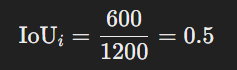

Пример 2: Вычисление mIoU
Допустим, у нас 3 класса, и значения IoU для них следующие:

- IoU
1
=
0.8
IoU 
1
​
 =0.8
- IoU
2
=
0.6
IoU 
2
​
 =0.6
- IoU
3
=
0.4
- IoU 
3
​
 =0.4


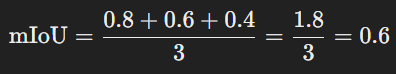

## 4.6 Инстансная и Паноптическая Сегментация

## 4.6.1 Метрики для Инстансной Сегментации
- Average Precision (AP): Аналогично задачам детекции, но с учетом масок объектов.

- AP@IoU: Вычисление AP при различных порогах IoU для масок.

- Mean Average Precision (mAP): Среднее значение AP по всем классам.

## 4.6.2 Паноптическая Качество (Panoptic Quality, PQ)
**Определение**

PQ объединяет аспекты семантической и инстансной сегментации.

**Формула**

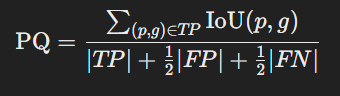


Где:

𝑇
𝑃
TP — множество пар правильно предсказанных сегментов.
𝐹
𝑃
FP — количество ложноположительных сегментов.
𝐹
𝑁
FN — количество пропущенных сегментов.
IoU
(
𝑝
,
𝑔
)
IoU(p,g) — значение IoU между предсказанным сегментом 
𝑝
p и истинным 
𝑔
g.

**Интерпретация**

PQ измеряет как качество сегментации (точность масок), так и качество детекции (наличие и количество объектов).


## 4.6.3 Компоненты PQ
- Segmentation Quality (SQ): Среднее значение IoU для правильно предсказанных сегментов.

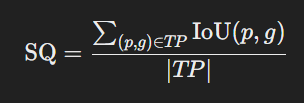

- Recognition Quality (RQ): F1-мера для сегментов.
- 
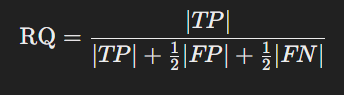

- PQ можно представить как произведение:
- 
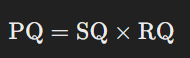


## 4.7 Особенности Вычисления Метрик}
### 4.7.1 Оценка на Батчах
- При вычислении метрик на батчах важно аккуратно суммировать значения, чтобы получить корректные результаты.

### 4.7.2 Учет Фона
- Некоторые метрики могут включать или исключать класс фона.
- С включением фона: Все классы, включая фон, учитываются при вычислении.
- Без учета фона: Фон не учитывается, что может быть полезно в некоторых приложениях.

### 4.7.3 Разрешение и Масштаб
- При изменении разрешения изображений важно согласовать предсказания и истинные маски.
- Интерполяция: Использование правильных методов интерполяции для масштабирования масок.

## 4.8 Практические Рекомендации
### 4.8.1 Выбор Метрики
- mIoU: Основная метрика для общей оценки модели.
- Dice Coefficient: Полезен в медицинских приложениях, где важно точное совпадение масок.
- Boundary Metrics: Используйте, если важна точность границ.

### 4.8.2 Учет Несбалансированности
- Применение взвешенных потерь при обучении модели (например, Weighted Cross-Entropy Loss).
- Использование метрик, которые учитывают малые классы (Mean Pixel Accuracy).

### 4.8.3 Визуализация Результатов
- Качественная оценка: Визуализация предсказанных масок вместе с истинными масками.
- Ошибка сегментации: Отображение областей, где модель ошибается.

### 4.8.4 Кросс-Валидация
- Использование кросс-валидации для получения надежных оценок метрик.
- Проверка модели на различных наборах данных.

### 4.9 Пример Использования Метрик
**Сценарий**
**Задача**:

Сегментация дорог на спутниковых снимках.

**Проблемы**:

Дороги занимают малую часть изображения, сложные условия съемки.

**Шаги**
**Выбор Метрик:**

- Dice Coefficient: Для оценки совпадения масок дорог.
- Boundary F1-Score: Для оценки точности границ дорог.
  
**Анализ Результатов:**

- Вычисление метрик для каждого изображения.
- Усреднение метрик по всему датасету.
  
**Интерпретация:**

- Низкий Dice Coefficient может указывать на пропуски в сегментации дорог.
- Низкий Boundary F1-Score может указывать на проблемы с точностью границ.
  
**Улучшение Модели:**

- Настройка модели для повышения чувствительности к малым объектам.
- Использование данных увеличения (data augmentation) для разнообразия обучающих данных.

## 4.10 Заключение
Оценка моделей сегментации требует тщательного выбора и интерпретации метрик. Понимание особенностей каждой метрики позволяет более точно оценить производительность модели и направить усилия на ее улучшение.

**Ключевые моменты:**

- mIoU и Dice Coefficient являются основными метриками для оценки качества сегментации.
- Учет несбалансированности классов важен для корректной оценки модели.
- Метрики должны выбираться с учетом специфики задачи и области применения.

**Рекомендации:**

- Используйте несколько метрик для полной оценки модели.
- Анализируйте результаты на уровне классов для выявления слабых мест модели.
- При необходимости применяйте специализированные метрики (например, PQ для паноптической сегментации).